# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | whangarei
Processing Record 6 of Set 1 | bako
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | taltal
Processing Record 17 of Set 1 | saint-joseph
Processing Record 18 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,50.83,71,12,1.99,NZ,1715134911
1,talnakh,69.4865,88.3972,12.20,90,41,5.55,RU,1715134911
2,wailua homesteads,22.0669,-159.3780,81.03,71,40,12.66,US,1715134911
3,edinburgh of the seven seas,-37.0676,-12.3116,61.29,92,100,44.52,SH,1715134912
4,whangarei,-35.7317,174.3239,60.10,60,24,6.42,NZ,1715134912


In [7]:
import os

# Define the directory path
output_dir = "output_data"

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,50.83,71,12,1.99,NZ,1715134911
1,talnakh,69.4865,88.3972,12.20,90,41,5.55,RU,1715134911
2,wailua homesteads,22.0669,-159.3780,81.03,71,40,12.66,US,1715134911
3,edinburgh of the seven seas,-37.0676,-12.3116,61.29,92,100,44.52,SH,1715134912
4,whangarei,-35.7317,174.3239,60.10,60,24,6.42,NZ,1715134912


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

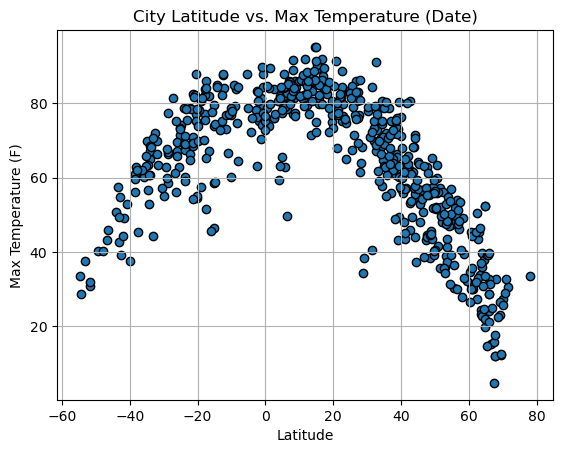

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

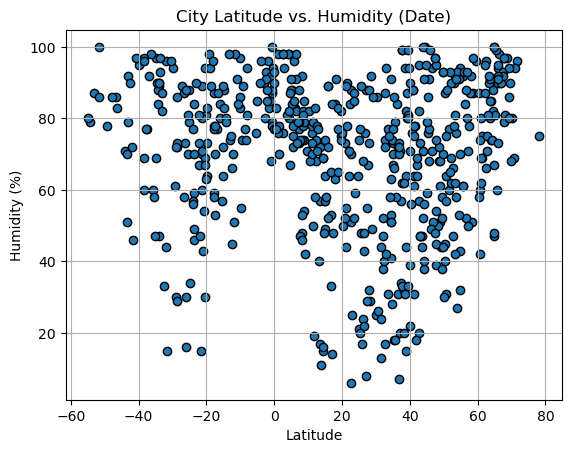

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

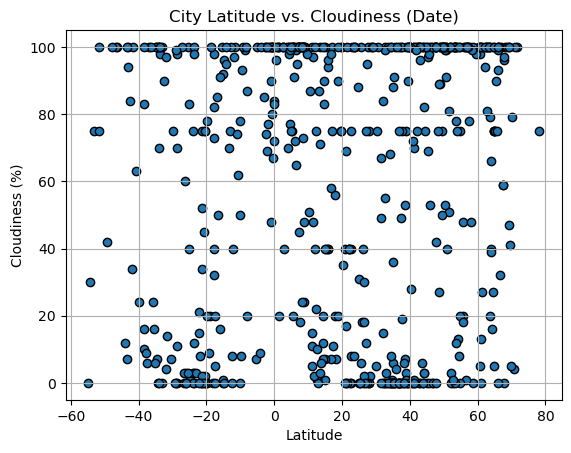

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

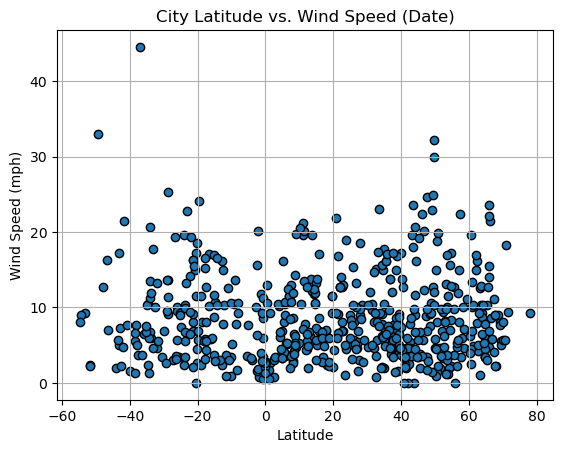

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Annotate the linear regression
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,talnakh,69.4865,88.3972,12.20,90,41,5.55,RU,1715134911
2,wailua homesteads,22.0669,-159.3780,81.03,71,40,12.66,US,1715134911
5,bako,5.7833,36.5667,62.83,96,91,3.51,ET,1715134912
6,albany,42.6001,-73.9662,61.92,57,100,3.47,US,1715134855
7,hamilton,39.1834,-84.5333,73.06,87,0,8.05,US,1715134912


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,50.83,71,12,1.99,NZ,1715134911
3,edinburgh of the seven seas,-37.0676,-12.3116,61.29,92,100,44.52,SH,1715134912
4,whangarei,-35.7317,174.3239,60.10,60,24,6.42,NZ,1715134912
11,west island,-12.1568,96.8225,84.18,70,40,10.36,CC,1715134914
12,port-aux-francais,-49.3500,70.2167,40.35,78,42,32.97,TF,1715134914


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7537500169337367


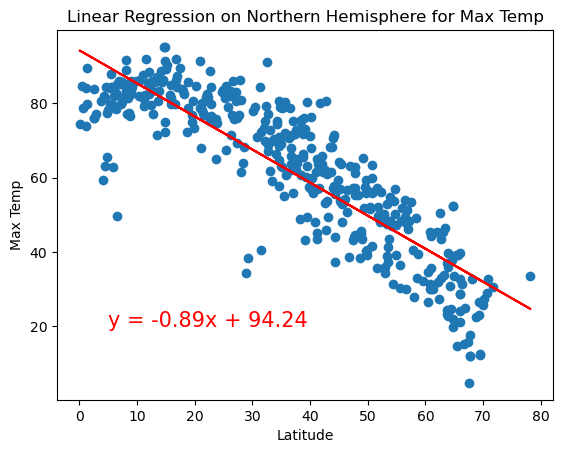

In [26]:
# Filter data for Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression and plot for temperature vs. latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Linear Regression on Northern Hemisphere for Max Temp", (5, 20))

The r-squared is: 0.5516791082650807


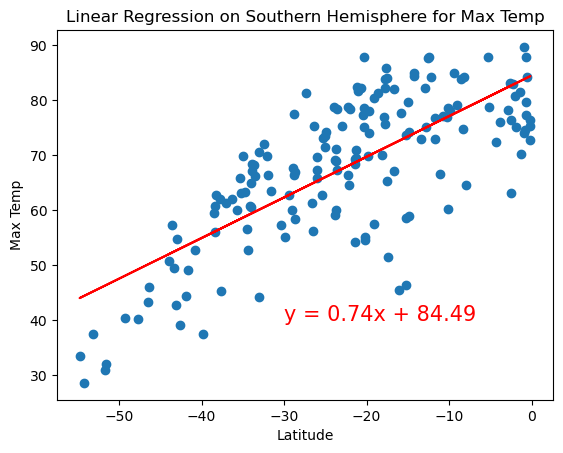

In [27]:
# Filter data for Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression and plot for temperature vs. latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Linear Regression on Southern Hemisphere for Max Temp", (-30, 40))

**Discussion about the linear relationship:** 
Northern Hemisphere:
About 75% of the change in temperature is because of how far you are from the equator.
When you go further from the equator in the Northern Hemisphere, it gets colder.
Southern Hemisphere:
About 55% of the change in temperature is because of how far you are from the equator.
When you go further from the equator in the Southern Hemisphere, it also gets colder, but this relationship is not as strong as in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.014177235075929466


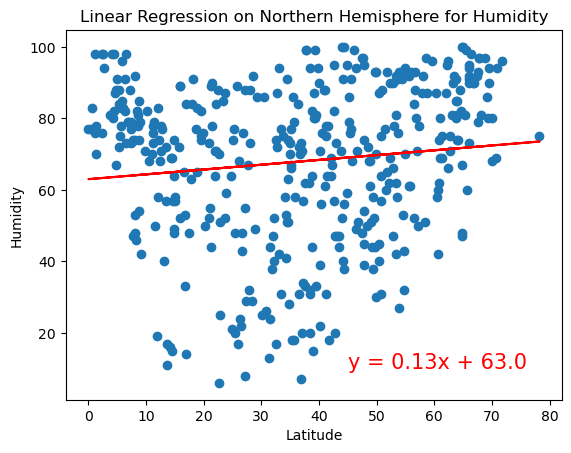

In [20]:
# Filter data for Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression and plot for humidity vs. latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Linear Regression on Northern Hemisphere for Humidity", (45, 10))

The r-squared is: 0.010793108035005196


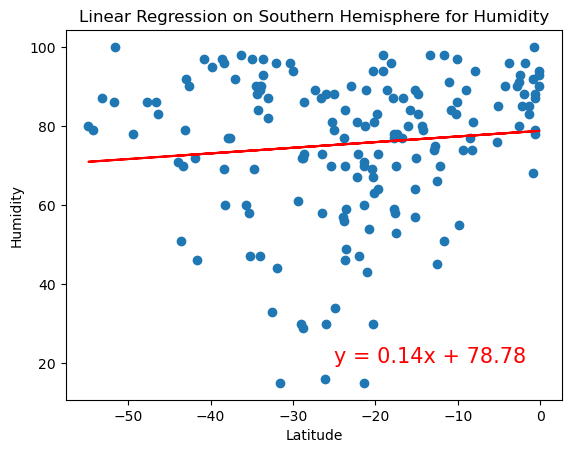

In [21]:
# Filter data for Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression and plot for humidity vs. latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Linear Regression on Southern Hemisphere for Humidity", (-25, 20))

**Discussion about the linear relationship:** 
Northern Hemisphere:
There's almost no connection between how humid it is and how far you are from the equator in the Northern Hemisphere.
Southern Hemisphere:
Similarly, there's almost no connection between humidity and distance from the equator in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.002149804064742592


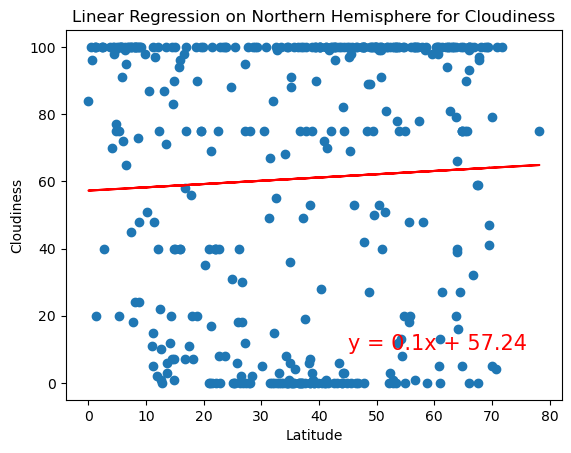

In [22]:
# Filter data for Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression and plot for cloudiness vs. latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Linear Regression on Northern Hemisphere for Cloudiness", (45, 10))

The r-squared is: 0.01517978473898114


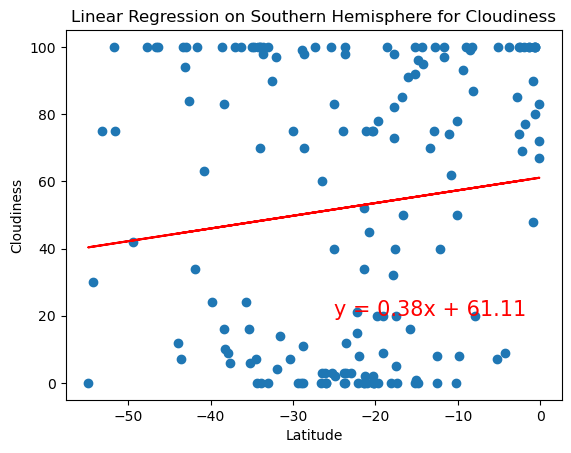

In [23]:
# Perform linear regression and plot for cloudiness vs. latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Linear Regression on Southern Hemisphere for Cloudiness", (-25, 20))

**Discussion about the linear relationship:** 
Northern Hemisphere:
There's basically no connection between how cloudy it is and how far you are from the equator in the Northern Hemisphere.
Southern Hemisphere:
In the Southern Hemisphere, there's a tiny bit of connection between cloudiness and distance from the equator, but it's still very weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004281269386605302


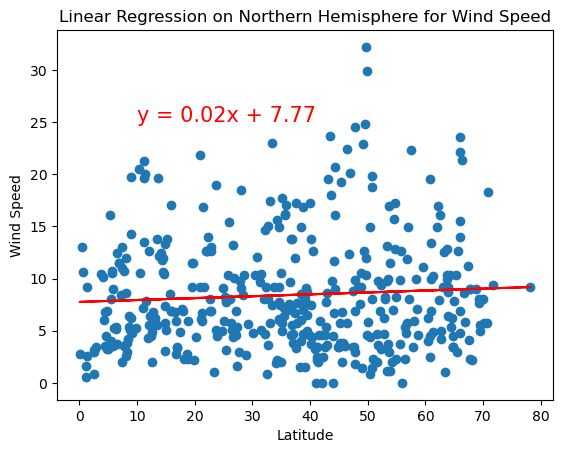

In [24]:
# Filter data for Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression and plot for wind speed vs. latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Linear Regression on Northern Hemisphere for Wind Speed", (10, 25))

The r-squared is: 0.017831558299013377


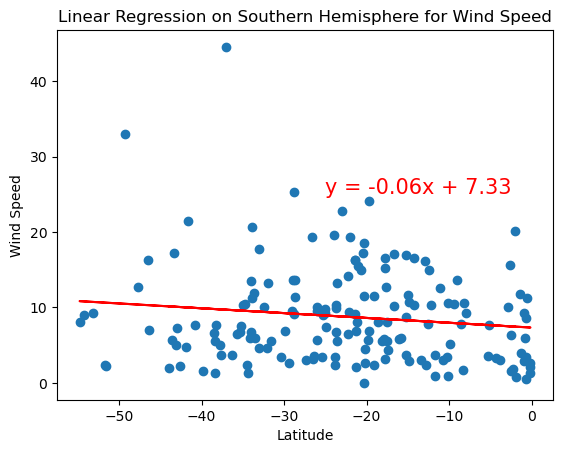

In [25]:
# Filter data for Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression and plot for wind speed vs. latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Linear Regression on Southern Hemisphere for Wind Speed", (-25, 25))

**Discussion about the linear relationship:** 
Northern Hemisphere:
There's hardly any connection between wind speed and how far you are from the equator in the Northern Hemisphere.
Southern Hemisphere:
In the Southern Hemisphere, there's a little bit of a connection between wind speed and distance from the equator, but it's still very weak.